In [43]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df_scores = pd.read_csv("../output/model_comparisons.csv")
df_scores = df_scores.loc[~df_scores["is_random"]]
df_scores = df_scores.drop(columns=["is_random"])

df_scores=df_scores.sort_values(by='Improvement', ascending=False)
df_scores.head(10)
#print(df_scores.head(10).to_string())

,Name,Score,Improvement,Complexity,Nr Samples,Nr Features,is_regression
7,xgboost_norm=0_weighted_title_prepend_sampling...,0.701257,0.128156,260064,1512,172,False
9,xgboost_norm=0_weighted_title_prepend_sampling...,0.742338,0.122480,240112,1396,172,False
11,xgboost_norm=0_weighted_title_prepend_sampling...,0.738170,0.108575,144824,842,172,False
5,xgboost_norm=0_weighted_title_prepend_sampling...,0.435013,0.083432,218440,1270,172,True
1,xgboost_norm=0_weighted_title_prepend_sampling...,0.424971,0.079075,395256,2298,172,True
3,xgboost_norm=0_weighted_title_prepend_sampling...,0.436422,0.067366,322672,1876,172,True


/tmp/ipykernel_9742/1490016928.py:27: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  fig.tight_layout()  # otherwise the right y-label is slightly clipped


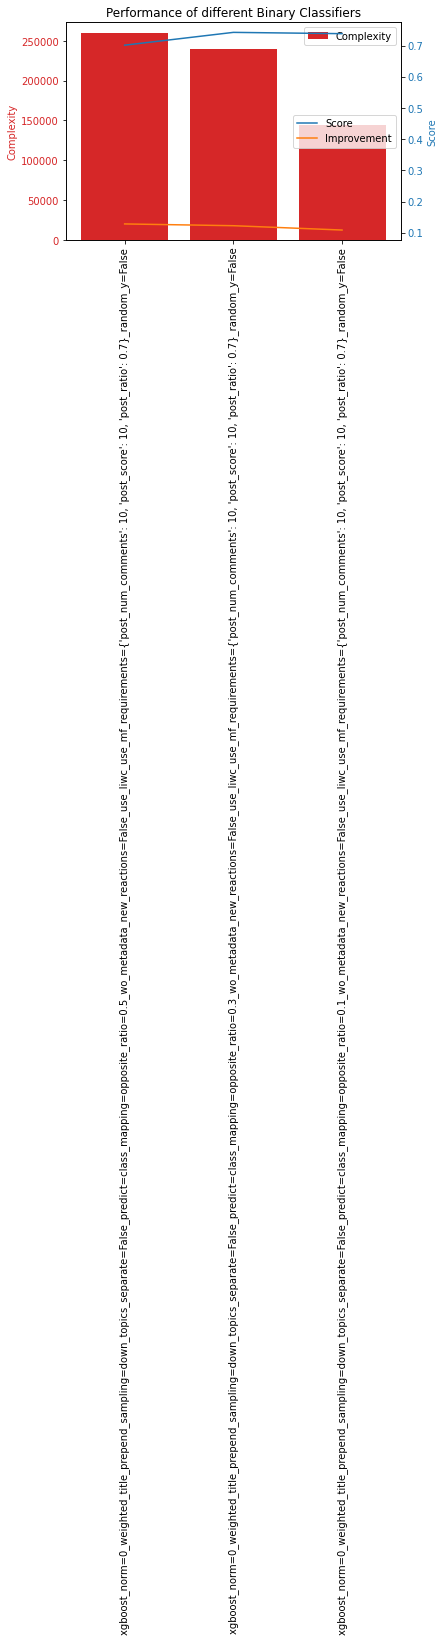

/tmp/ipykernel_9742/1490016928.py:27: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  fig.tight_layout()  # otherwise the right y-label is slightly clipped


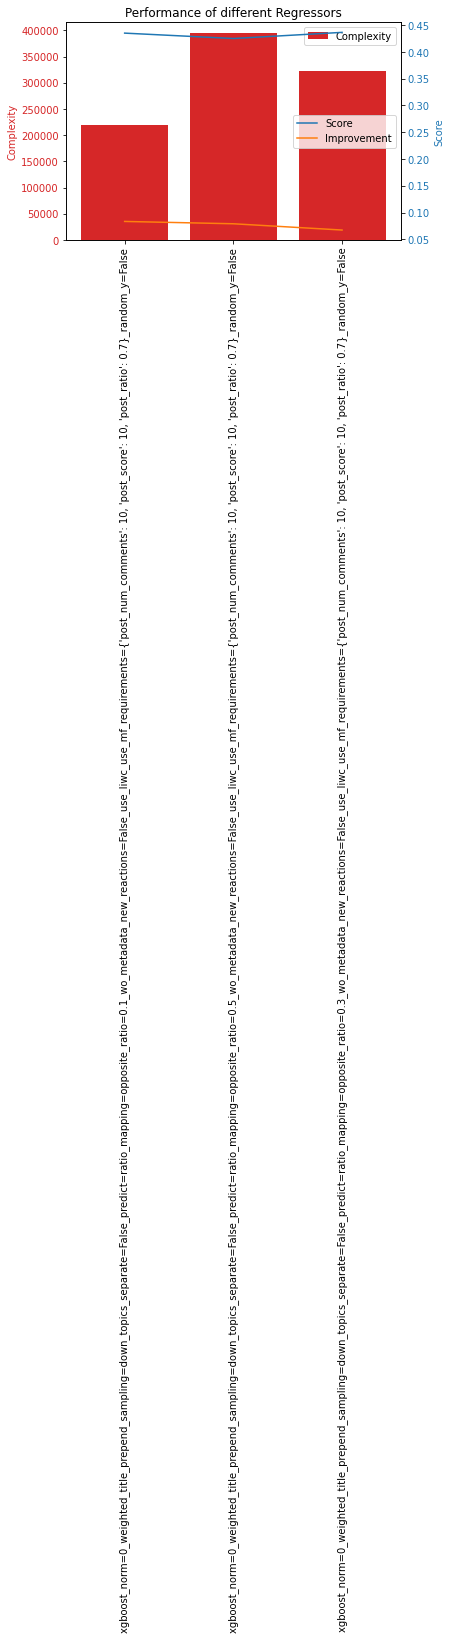

In [44]:
df_reg = df_scores.loc[df_scores["is_regression"]]
df_bin = df_scores.loc[~df_scores["is_regression"]]

for df in [df_bin, df_reg]:
    clf_type = "Regressors" if df.iloc[0]["is_regression"] else "Binary Classifiers"
    x_ticks = df["Name"]
    x_loc = range(len(df))
    fig, ax1 = plt.subplots()

    color = 'tab:red'
    ax1.set_ylabel('Complexity', color=color)  # we already handled the x-label with ax1
    ax1.bar(x_loc, df["Complexity"], color=color, )
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.set_xticks(x_loc)
    ax1.set_xticklabels(x_ticks, rotation = 90)

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    color = 'tab:blue'
    ax2.set_ylabel('Score', color=color)
    ax2.plot(x_loc, df["Score"], color='tab:blue',)
    ax2.plot(x_loc, df["Improvement"], color='tab:orange')
    ax2.tick_params(axis='y', labelcolor=color)

    ax1.legend(['Complexity'])
    ax2.legend(['Score', 'Improvement'])
    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    
    plt.title(f"Performance of different {clf_type}")
    plt.show()